# 准备数据

In [1]:
# 加载模块
import polars as pl

from vnpy.trader.constant import Interval

from vnpy.alpha import AlphaLab

In [2]:
# 创建数据中心
lab: AlphaLab = AlphaLab("./lab/csi300")

In [3]:
# 设置任务参数
name = "101"
index_symbol: str = "000300.SSE"
start: str = "2008-01-01"
end: str = "2023-12-31"
interval: Interval = Interval.DAILY
extended_days: int = 100

In [4]:
# 加载所有成分股代码
component_symbols: list[str] = lab.load_component_symbols(index_symbol, start, end)

# 特征计算

In [5]:
# 加载模块
from vnpy.trader.constant import Interval

from vnpy.alpha.dataset import AlphaDataset
from vnpy.alpha.dataset.datasets.alpha_101 import Alpha101

In [6]:
# 加载成分股数据
df: pl.DataFrame = lab.load_bar_df(component_symbols, interval, start, end, extended_days)

In [7]:
df.head()

datetime,open,high,low,close,volume,turnover,open_interest,vwap,vt_symbol
datetime[μs],f32,f32,f32,f32,f32,f32,f32,f32,str
2007-09-24 00:00:00,0.969093,1.028801,0.948742,1.0,6.226956e6,5.2948144e7,0.0,8.503054,"""600246.SSE"""
2007-09-25 00:00:00,1.0,1.036985,0.991017,1.00793,9.745981e6,8.5892944e7,0.0,8.813166,"""600246.SSE"""
2007-09-26 00:00:00,0.997361,1.043595,0.99155,1.022457,8.786781e6,7.7376688e7,0.0,8.806034,"""600246.SSE"""
2007-09-27 00:00:00,1.033026,1.033026,0.978863,1.004225,6.374063e6,5.5102776e7,0.0,8.644843,"""600246.SSE"""
2007-09-28 00:00:00,1.004491,1.042275,1.004491,1.036719,1.6758469e7,1.49402192e8,0.0,8.915027,"""600246.SSE"""


In [8]:
# 创建数据集对象
dataset: AlphaDataset = Alpha101(
    df,
    train_period = ("2008-01-01", "2014-12-31"),
    valid_period = ("2015-01-01", "2016-12-31"),
    test_period = ("2017-01-01", "2020-8-31"),
)

In [9]:
# 收集指数成分过滤器
filters: dict[str, list[str]] = lab.load_component_filters(index_symbol, start, end)

In [10]:
# 准备特征和标签数据
dataset.prepare_data(filters)

2025-06-21 16:13:29 开始计算表达式因子特征


100%|██████████| 2/2 [00:03<00:00,  1.85s/it]

2025-06-21 16:13:34 开始合并结果数据因子特征



0it [00:00, ?it/s]

2025-06-21 16:13:35 开始筛选成分股数据



100%|██████████| 819/819 [00:08<00:00, 98.58it/s] 


In [11]:
dataset.raw_df

datetime,vt_symbol,alpha41,label
datetime[μs],str,f32,f32
2008-01-02 00:00:00,"""000001.SZSE""",-7.209551,0.048723
2008-01-02 00:00:00,"""000002.SZSE""",-9.98982,0.059317
2008-01-02 00:00:00,"""000009.SZSE""",-3.886637,-0.022241
2008-01-02 00:00:00,"""000012.SZSE""",-5.36322,0.058878
2008-01-02 00:00:00,"""000021.SZSE""",-8.721232,0.018523
…,…,…,…
2023-12-29 00:00:00,"""688363.SSE""",-66.09082,-0.019187
2023-12-29 00:00:00,"""688396.SSE""",-43.393555,-0.011668
2023-12-29 00:00:00,"""688561.SSE""",-39.695423,-0.037323


c:\veighna_studi\Lib\site-packages\alphalens\utils.py:308: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.pct_change(period)
c:\veighna_studi\Lib\site-packages\alphalens\utils.py:308: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.pct_change(period)
c:\veighna_studi\Lib\site-packages\alphalens\utils.py:308: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns

Dropped 4.7% entries from factor data: 4.7% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-1609.067627,-5.562471,-34.918575,58.248966,191484,10.075152
2,-53.917503,-3.786216,-14.304096,5.430696,189875,9.990492
3,-25.738846,-3.149411,-10.211810,3.271175,189571,9.974497
4,-17.424122,-2.498976,-7.876145,2.296974,189897,9.991650
5,-14.305250,-2.046591,-6.176511,1.741379,190242,10.009802
6,-11.883571,-1.719258,-4.950808,1.369817,189258,9.958028
7,-10.087947,-1.396019,-3.993025,1.116849,189586,9.975286
8,-8.412411,-1.063864,-3.188005,0.917258,189882,9.990861
9,-6.489058,-0.614139,-2.394943,0.716038,189599,9.975970


Returns Analysis


,1D,5D,10D
Ann. alpha,0.053,0.056,0.053
beta,0.024,0.036,0.033
Mean Period Wise Return Top Quantile (bps),4.692,5.462,5.518
Mean Period Wise Return Bottom Quantile (bps),-3.098,-3.318,-3.255
Mean Period Wise Spread (bps),7.790,8.882,8.888


<Figure size 640x480 with 0 Axes>

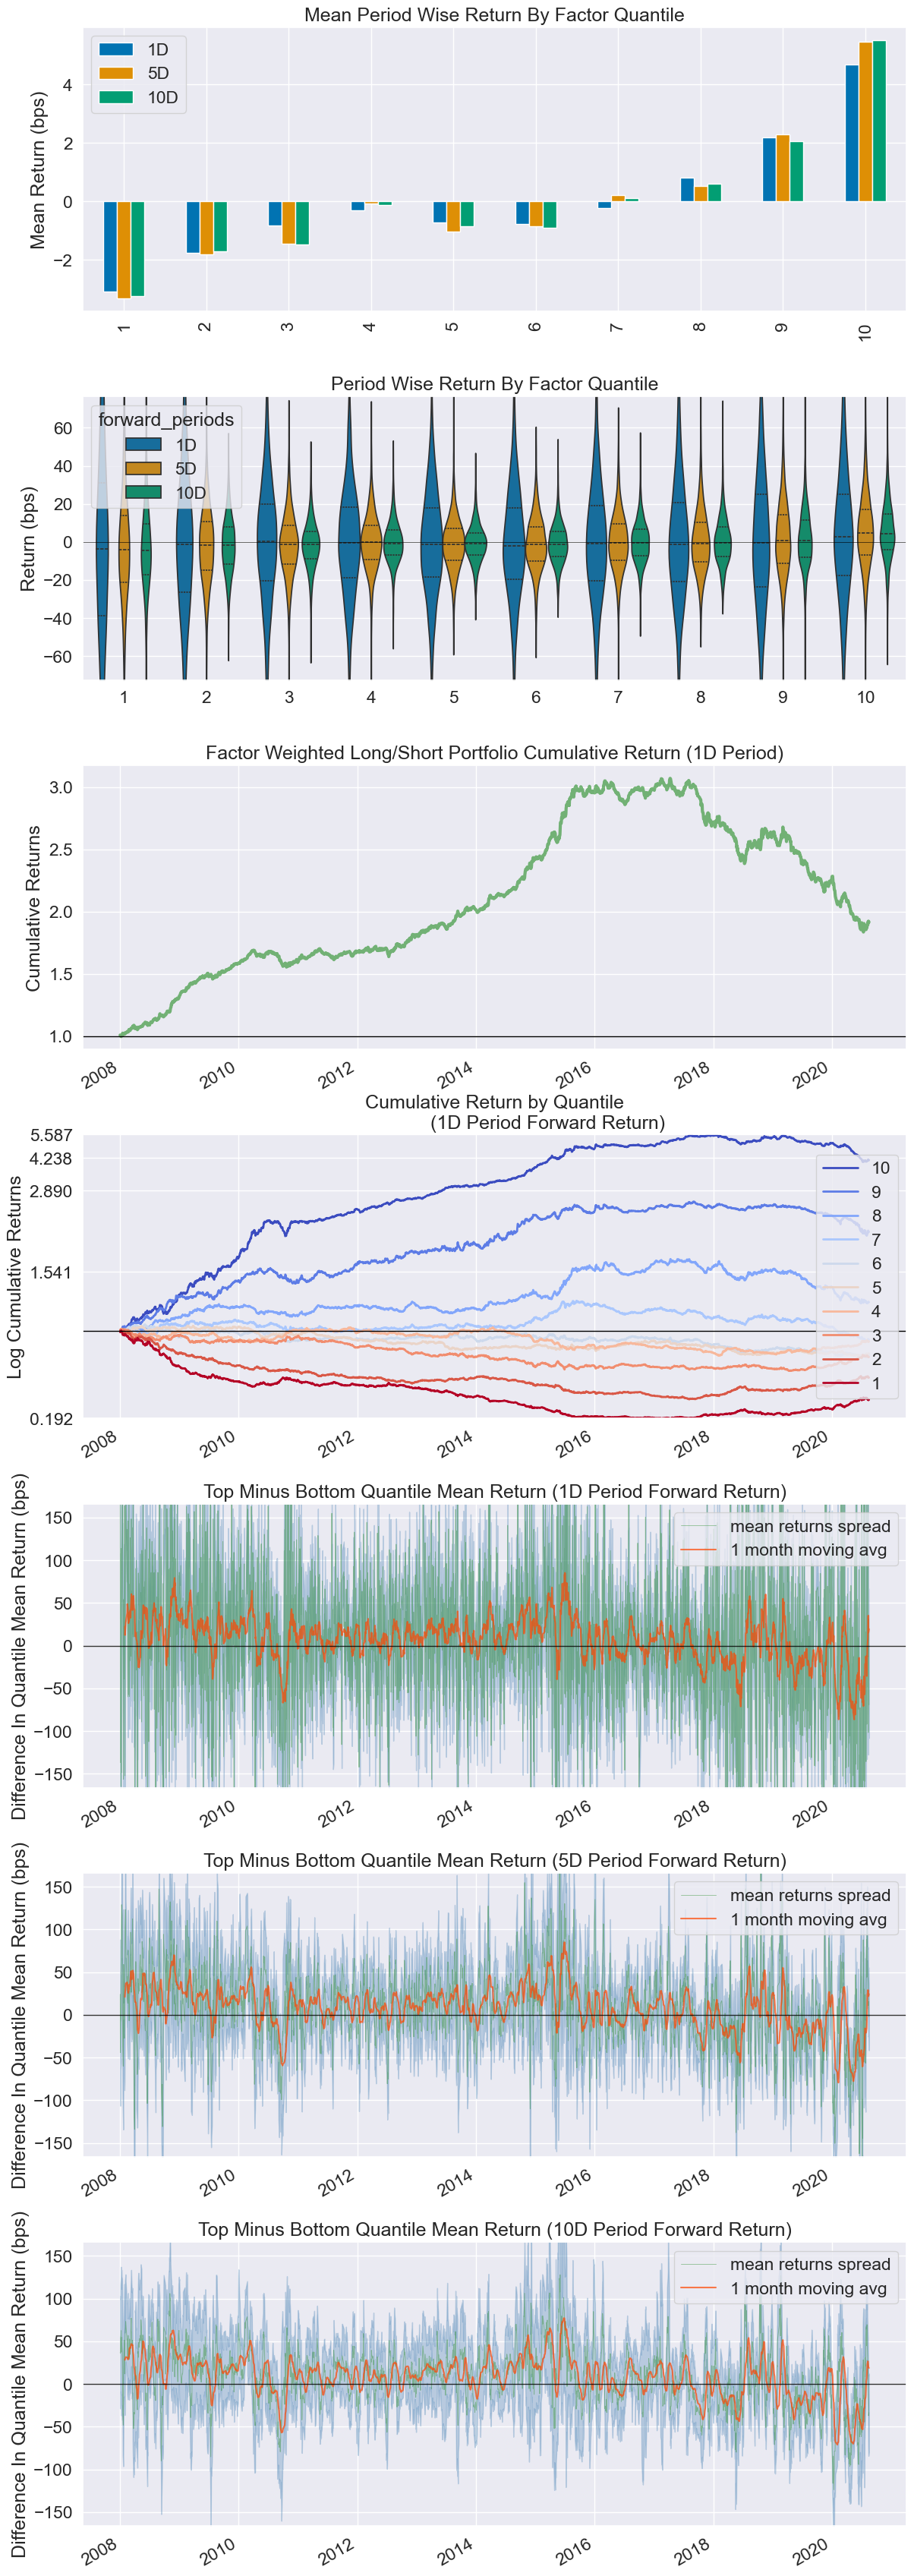

Information Analysis


,1D,5D,10D
IC Mean,0.010,0.021,0.030
IC Std.,0.114,0.130,0.142
Risk-Adjusted IC,0.092,0.159,0.211
t-stat(IC),5.085,8.804,11.669
p-value(IC),0.000,0.000,0.000
IC Skew,-0.046,-0.043,-0.113
IC Kurtosis,0.534,-0.056,-0.312


c:\veighna_studi\Lib\site-packages\alphalens\performance.py:118: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  grouper.append(pd.Grouper(freq=by_time))


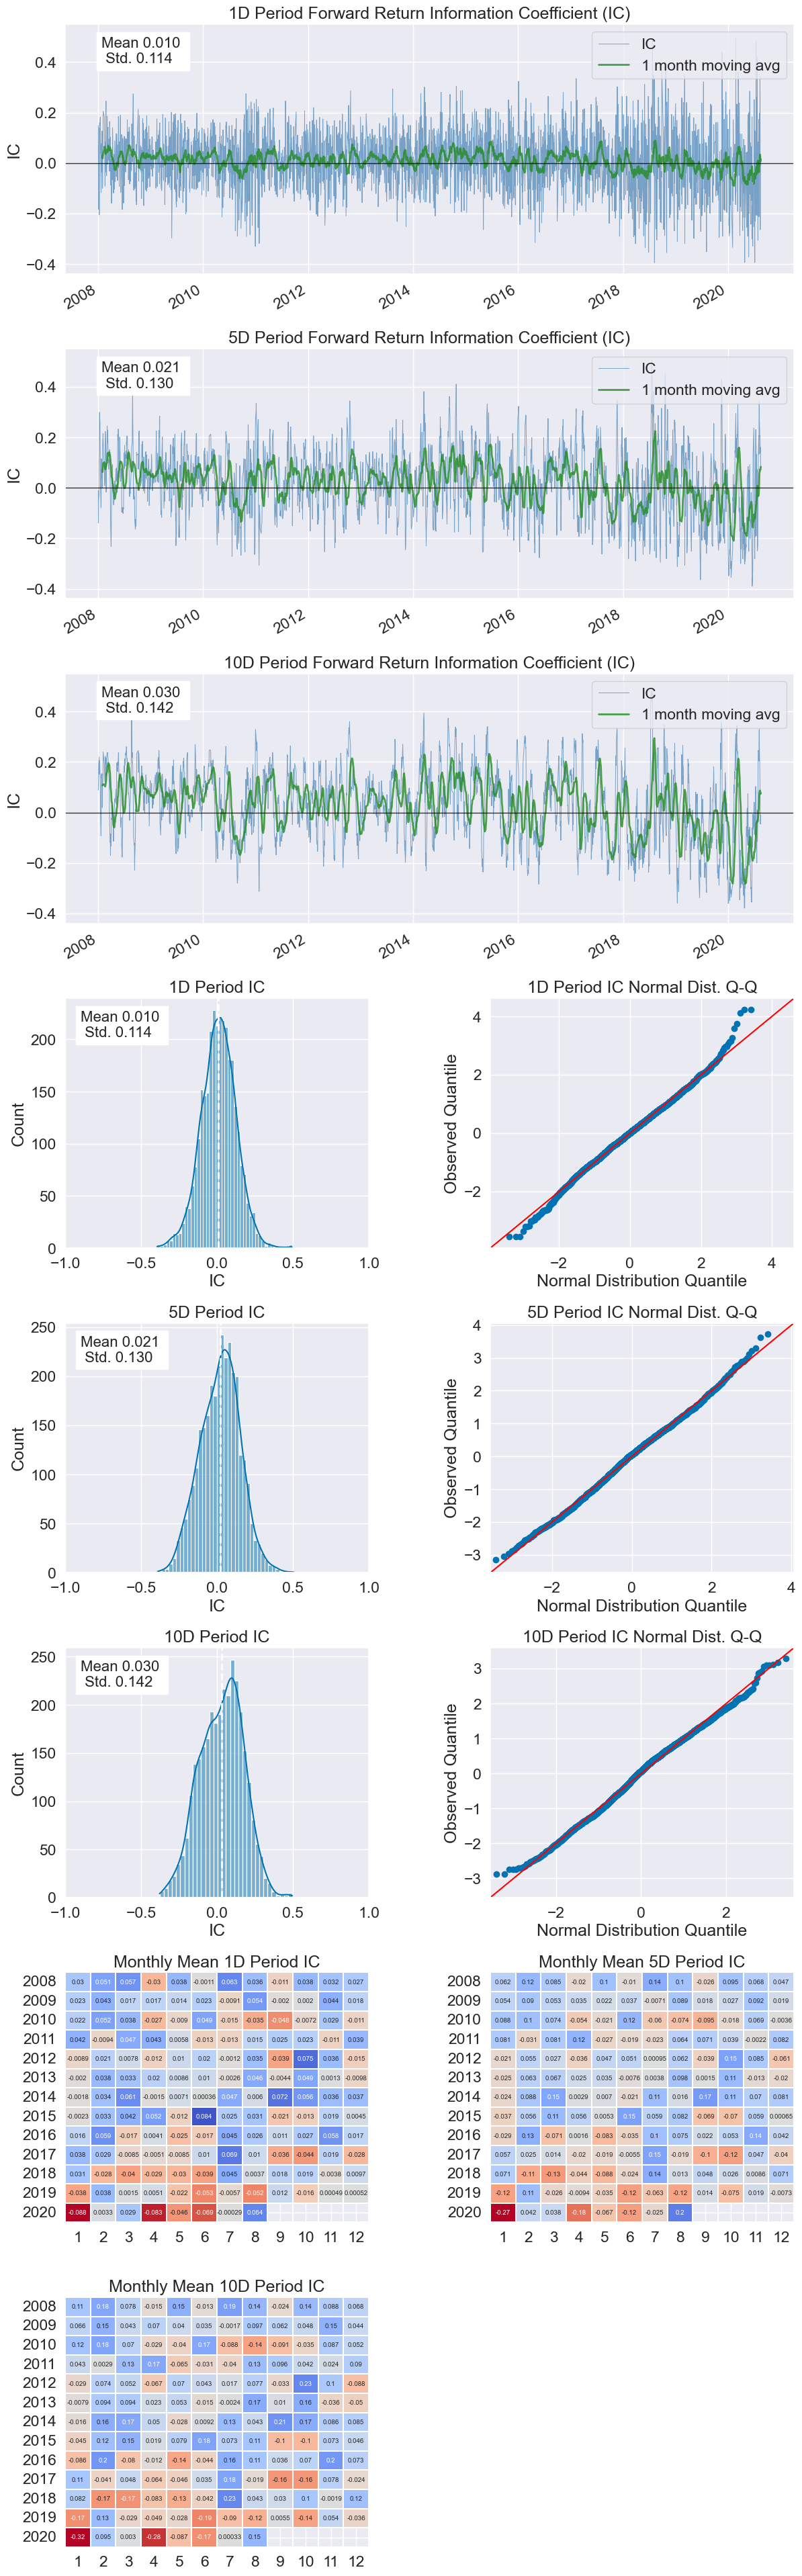

c:\veighna_studi\Lib\site-packages\alphalens\utils.py:928: UserWarning: Skipping return periods that aren't exact multiples of days.
  warnings.warn(


Turnover Analysis


,1D,5D,10D
Quantile 1 Mean Turnover,0.025,0.055,0.076
Quantile 2 Mean Turnover,0.056,0.122,0.168
Quantile 3 Mean Turnover,0.071,0.157,0.215
Quantile 4 Mean Turnover,0.076,0.170,0.232
Quantile 5 Mean Turnover,0.078,0.174,0.237
Quantile 6 Mean Turnover,0.080,0.176,0.239
Quantile 7 Mean Turnover,0.075,0.164,0.224
Quantile 8 Mean Turnover,0.066,0.142,0.193
Quantile 9 Mean Turnover,0.048,0.099,0.135
Quantile 10 Mean Turnover,0.023,0.044,0.061


,1D,5D,10D
Mean Factor Rank Autocorrelation,1.0,0.998,0.996


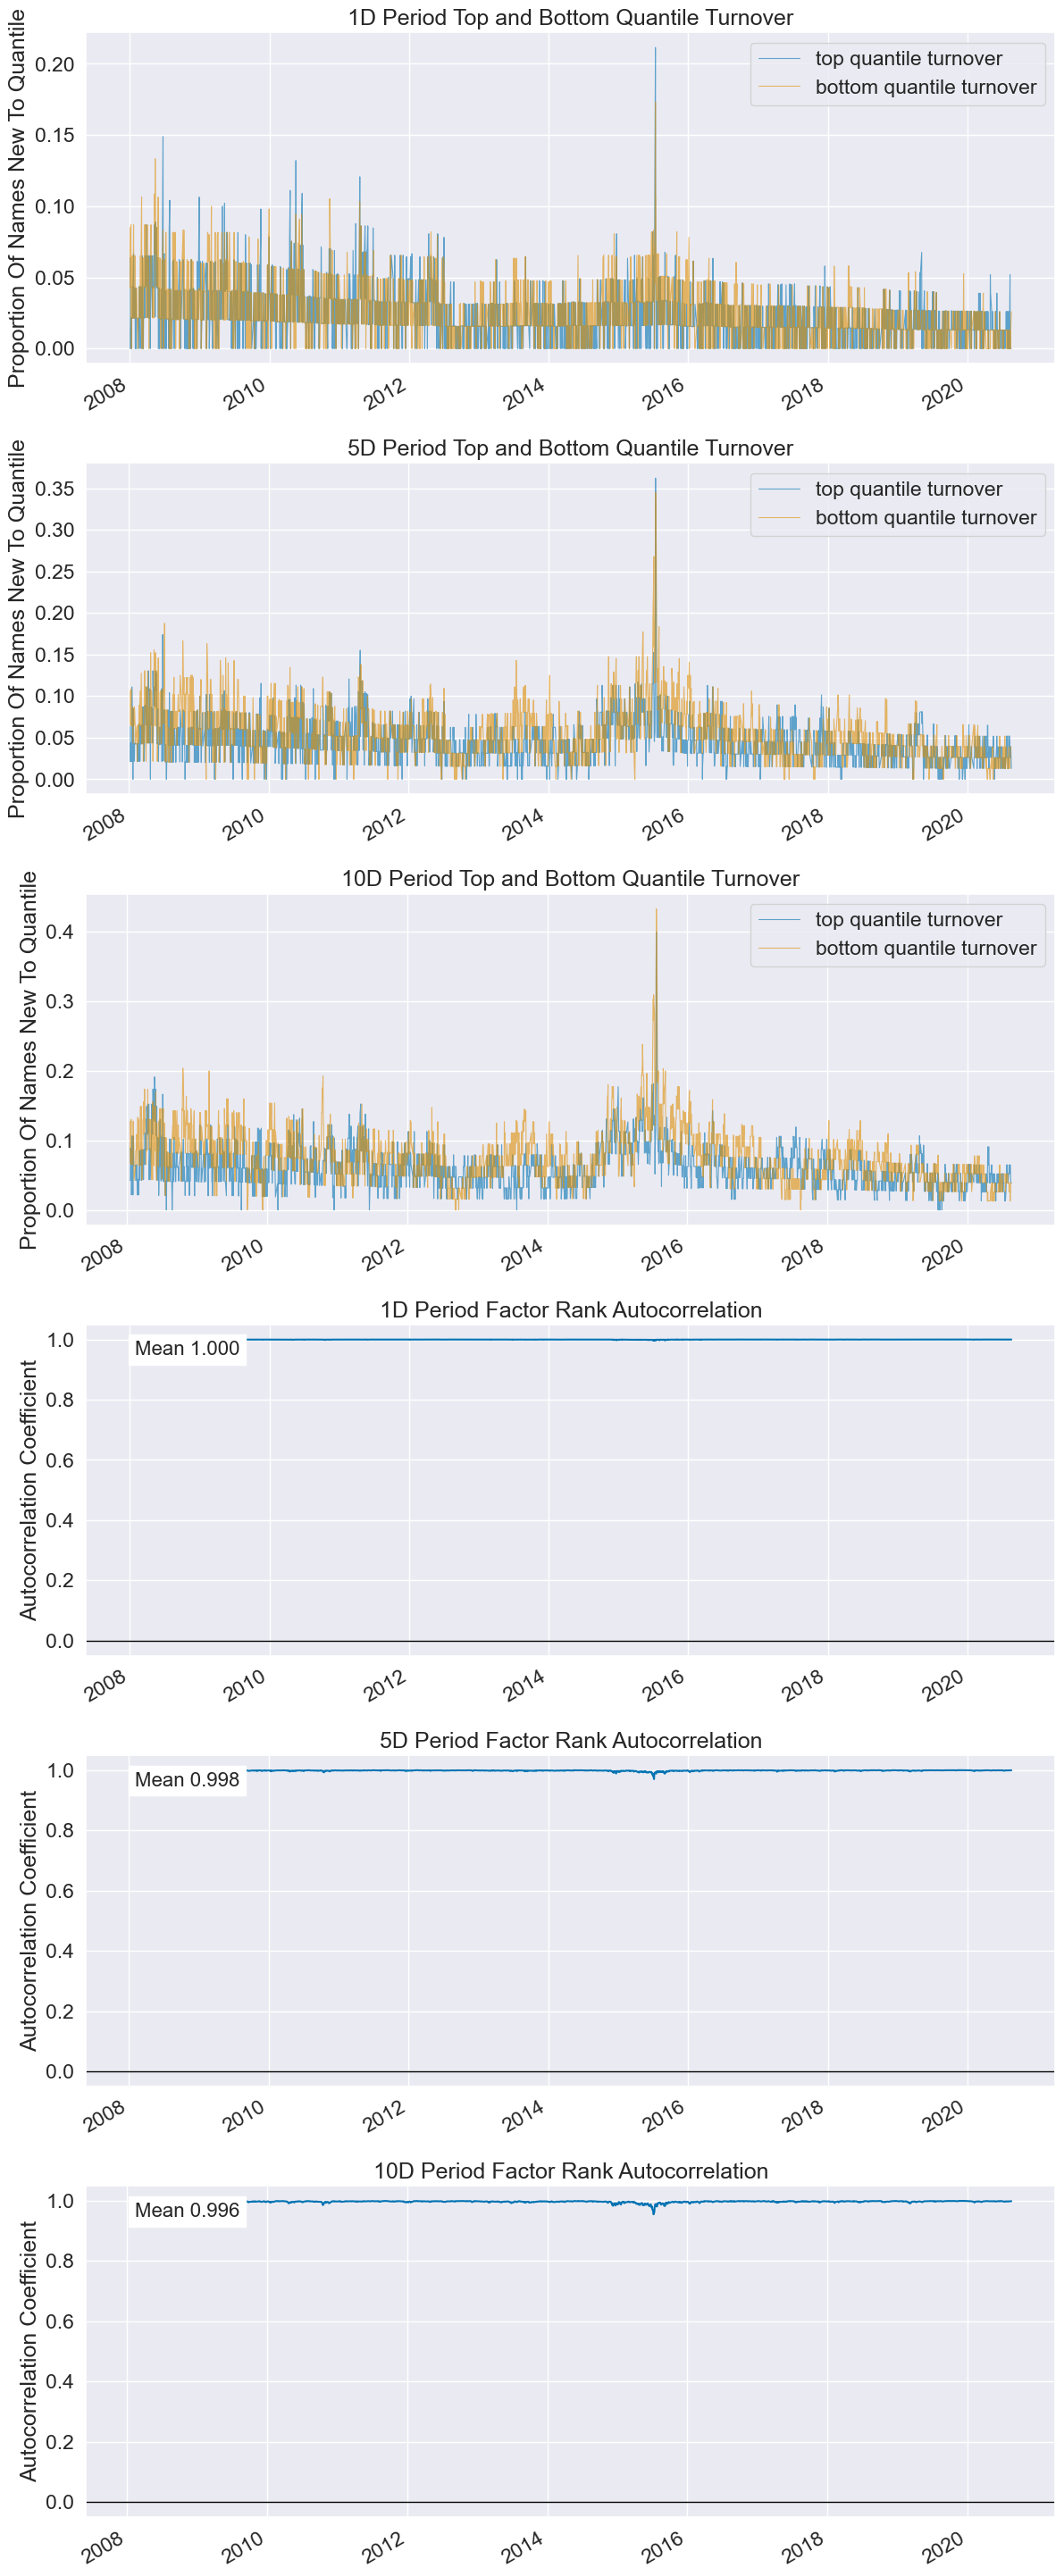

In [13]:
# 特征表现分析
dataset.show_feature_performance("alpha41")